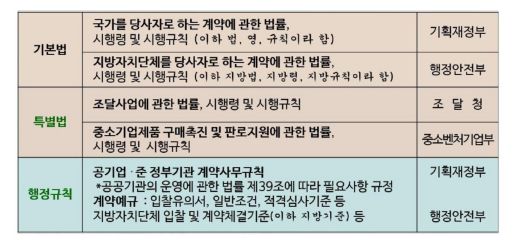

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# 이미지 파일이 저장된 경로
image_dir = 'C:/Users/Yoon/Yoon/2024/BITAMIN/2nd_session/CV_project/032.표_이미지-텍스트_쌍_데이터/조합표/train_원천'

# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# 첫 번째 이미지 불러오기
first_image_path = os.path.join(image_dir, image_files[0])
image = Image.open(first_image_path)

# 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

In [10]:
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    with Image.open(image_path) as img:
        print(f'{image_file} - Size: {img.size}')

T02_C01_50000_1253_13.jpg - Size: (1041, 473)
T02_C01_50000_1302_53.jpg - Size: (1338, 1130)
T02_C01_50000_1302_63.jpg - Size: (1289, 1030)
T02_C01_50000_1303_228.jpg - Size: (1039, 326)
T02_C01_50000_1346_12.jpg - Size: (1365, 658)
T02_C01_50000_1346_19.jpg - Size: (1419, 1312)
T02_C01_50000_1347_1.jpg - Size: (1019, 186)
T02_C01_50000_1406_2321.jpg - Size: (1361, 383)
T02_C01_50000_1406_3178.jpg - Size: (1383, 304)
T02_C01_50000_1406_3258.jpg - Size: (1372, 265)
T02_C01_50000_1406_3303.jpg - Size: (1412, 595)
T02_C01_50000_1406_3308.jpg - Size: (1457, 611)
T02_C01_50000_1465_10.jpg - Size: (1342, 225)
T02_C01_50000_1534_4.jpg - Size: (895, 212)
T02_C01_50000_1617_25.jpg - Size: (1140, 777)
T02_C01_50000_1675_19.jpg - Size: (1195, 1453)
T02_C01_50000_1828_241.jpg - Size: (1124, 295)
T02_C01_50000_1831_110.jpg - Size: (888, 269)
T02_C01_50000_1831_111.jpg - Size: (870, 283)
T02_C01_50000_1831_112.jpg - Size: (862, 349)
T02_C01_50000_1831_113.jpg - Size: (851, 267)
T02_C01_50000_1844_10

In [11]:
import numpy as np
import pandas as pd

# 이미지 크기 정보를 저장할 리스트
widths = []
heights = []

# 이미지 크기 정보를 추출
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        widths.append(width)
        heights.append(height)

# pandas 데이터프레임으로 변환
df = pd.DataFrame({
    'file_name': image_files,
    'width': widths,
    'height': heights
})

# 기본 통계량 출력
print(df.describe())

              width        height
count  40637.000000  40637.000000
mean    1075.993946    612.134582
std      240.585249    343.276382
min      224.000000    110.000000
25%      959.000000    368.000000
50%     1103.000000    518.000000
75%     1227.000000    751.000000
max     5304.000000   3637.000000


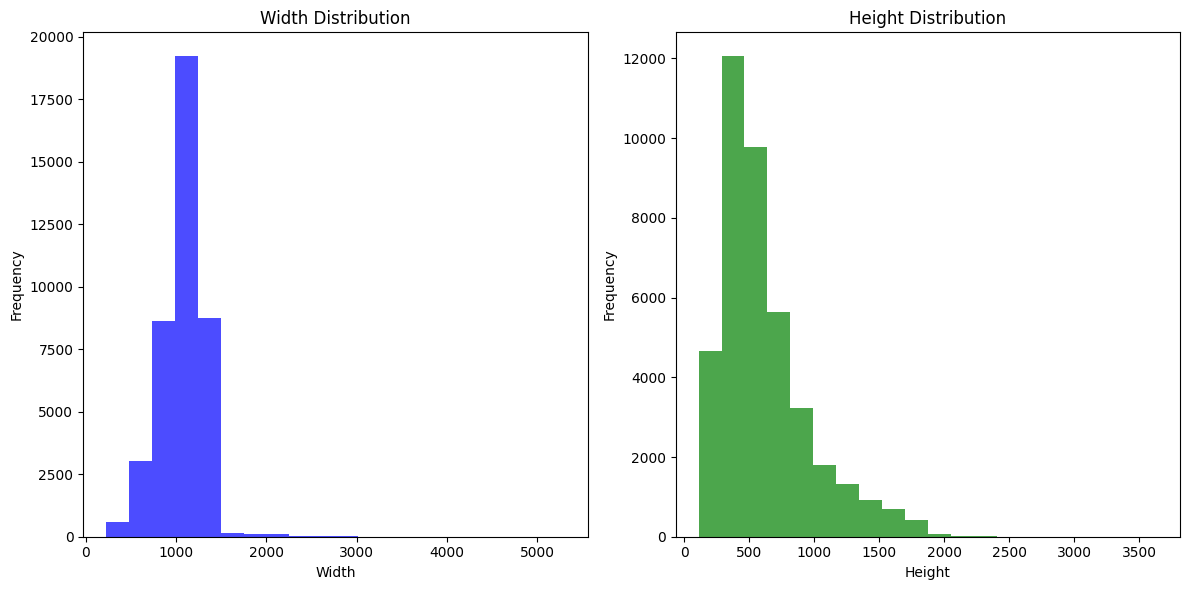

In [12]:
import matplotlib.pyplot as plt

# 너비와 높이에 대한 히스토그램
plt.figure(figsize=(12, 6))

# 너비 분포
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

# 높이 분포
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

count    40637.000000
mean         2.261925
std          1.204005
min          0.168428
25%          1.379429
50%          2.046377
75%          2.911688
max         17.072727
Name: aspect_ratio, dtype: float64


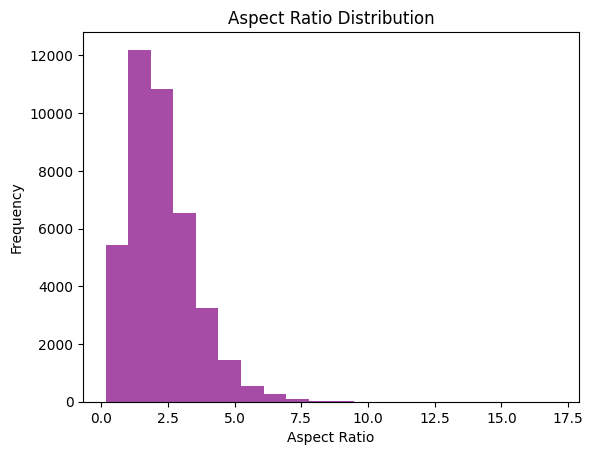

In [13]:
# 가로 세로 비율 계산
df['aspect_ratio'] = df['width'] / df['height']

# 가로 세로 비율의 기본 통계량 출력
print(df['aspect_ratio'].describe())

# 가로 세로 비율 히스토그램
plt.hist(df['aspect_ratio'], bins=20, color='purple', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 정사각형에 가까운 이미지 필터링 (가로 세로 비율이 1.0에 가까운)
square_images = df[(df['aspect_ratio'] >= 0.9) & (df['aspect_ratio'] <= 1.1)]

print(f"정사각형에 가까운 이미지 수: {len(square_images)}")
print(square_images)

정사각형에 가까운 이미지 수: 2403
                        file_name  width  height  aspect_ratio
5       T02_C01_50000_1346_19.jpg   1419    1312      1.081555
38     T02_C01_50001_1571_023.jpg    907     967      0.937952
53     T02_C01_50002_1192_100.jpg   1127    1032      1.092054
95     T02_C01_50003_1593_016.jpg    656     610      1.075410
99     T02_C01_50003_1789_012.jpg   1315    1272      1.033805
...                           ...    ...     ...           ...
40512  T02_C06_58000_1729_062.jpg    620     570      1.087719
40561  T02_C06_58000_1891_049.jpg   1167    1202      0.970882
40583  T02_C06_58000_1991_289.jpg   1209    1252      0.965655
40596  T02_C06_58001_1030_019.jpg   1248    1177      1.060323
40628  T02_C06_58001_1129_018.jpg   1320    1208      1.092715

[2403 rows x 4 columns]


count    4.063700e+04
mean     6.702702e+05
std      4.598860e+05
min      3.352500e+04
25%      3.714050e+05
50%      5.489360e+05
75%      8.221680e+05
max      1.839427e+07
Name: resolution, dtype: float64


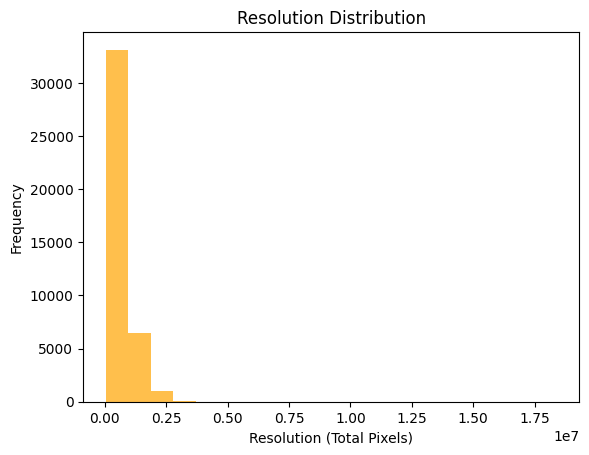

In [15]:
# 해상도(총 픽셀 수) 계산
df['resolution'] = df['width'] * df['height']

# 해상도의 기본 통계량 출력
print(df['resolution'].describe())

# 해상도 분포 히스토그램
plt.hist(df['resolution'], bins=20, color='orange', alpha=0.7)
plt.title('Resolution Distribution')
plt.xlabel('Resolution (Total Pixels)')
plt.ylabel('Frequency')
plt.show()